<a href="https://colab.research.google.com/github/amackjp/datascience/blob/main/5301_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests, zipfile
from io import StringIO
import io

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込みと整形

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip"

r = requests.get(url, stream=True)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [ ]:
student_data_math = pd.read_csv("/content/student-mat.csv")

In [ ]:
student_data_math.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [ ]:
student_data_math = pd.read_csv("/content/student-mat.csv", sep=";")

In [ ]:
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
student_data_math.describe() # 種々の要約統計量の算出

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# さまざまな図の出力方法

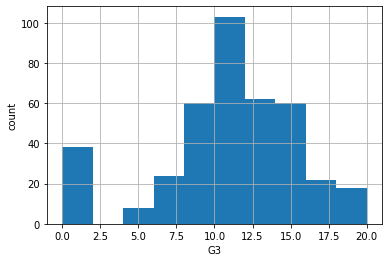

In [ ]:
# histogram
plt.hist(student_data_math["G3"])
plt.xlabel("G3")
plt.ylabel("count")
plt.grid(True)

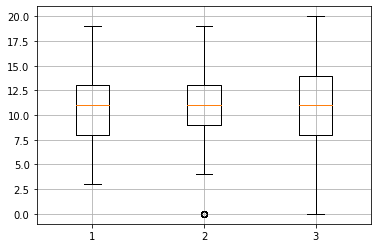

In [ ]:
# boxplot
plt.boxplot([student_data_math["G1"], student_data_math["G2"], student_data_math["G3"]])
plt.grid(True)

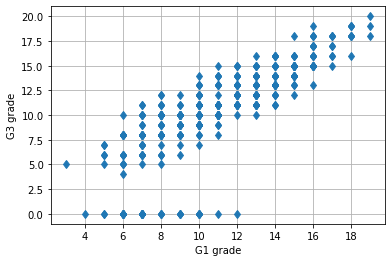

In [ ]:
# scatterplot
plt.plot(student_data_math["G1"], student_data_math["G3"], "d")
plt.ylabel("G3 grade")
plt.xlabel("G1 grade")
plt.grid(True)

In [ ]:
import scipy.stats as stats

In [ ]:
r, p = stats.pearsonr(student_data_math["G1"], student_data_math["G3"]) # rは相関係数，pはp値
r, p
# print(r)

(0.8014679320174141, 9.001430312277354e-90)

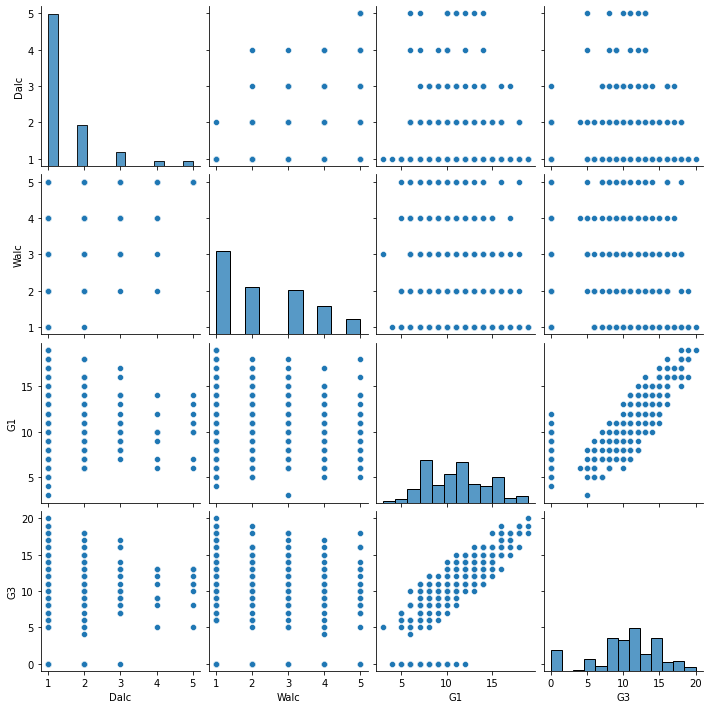

In [ ]:
sns.pairplot(student_data_math[["Dalc","Walc","G1","G3"]])
plt.grid(True)
#Dalc - Day alchole

# 単回帰

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression() # インスタンスを作成

In [ ]:
X = student_data_math.loc[:,["G1"]].values
y = student_data_math["G3"].values
reg.fit(X,y)
print("回帰係数:", reg.coef_)
print("切片:", reg.intercept_)

回帰係数: [1.10625609]
切片: -1.6528038288004634


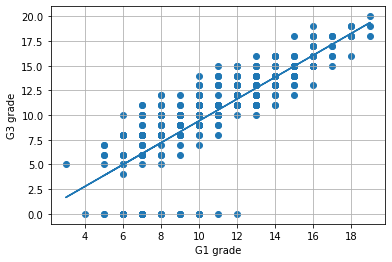

In [ ]:
plt.scatter(X,y) # 散布図
plt.xlabel("G1 grade")
plt.ylabel("G3 grade")
plt.plot(X, reg.predict(X))
plt.grid(True)

In [ ]:
print("決定係数:", reg.score(X,y))

決定係数: 0.6423508460522701
